In this notebook, I take a dataset originally intended for Excel and do the same analysis more simply using pandas. I also practice using a chi squared test of independence between two categorical variables with Scipy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Data Schema and Status
Data and questions from https://github.com/MicrosoftLearning/AppliedDataAnalysis/blob/master/ChallengeLab.pdf

In [2]:
survey = pd.read_csv('lawn_mower_survey.csv')
# pd.read_csv('https://raw.githubusercontent.com/MicrosoftLearning/AppliedDataAnalysis/master/ChallengeLab.csv')

In [3]:
survey.head()

,id,age,receive.offer,repeat.customer,prod
0,1,29,No,Yes,Yard Smasher
1,2,37,No,Yes,Yard Smasher
2,3,34,No,No,Yard Smasher
3,4,51,No,Yes,Yard Smasher
4,5,26,No,No,Yard Smasher


In [4]:
survey.shape

(3851, 5)

In [5]:
survey.describe(include='all')
# id = unique individual
# age: in years
# receive_offer: Y/N to "willing to hear about more products?"
# repeat.customer: Y/N to "purchased in the past?"
# prod: str, name of product purchased

,id,age,receive.offer,repeat.customer,prod
count,3851.000000,3851.000000,3851,3851,3851
unique,NaN,NaN,2,2,3
top,NaN,NaN,No,No,Yard Smasher
freq,NaN,NaN,3002,1987,2019
mean,1926.000000,44.382758,NaN,NaN,NaN
std,1111.832272,16.623968,NaN,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN
25%,963.500000,31.000000,NaN,NaN,NaN
50%,1926.000000,41.000000,NaN,NaN,NaN
75%,2888.500000,58.000000,NaN,NaN,NaN


In [6]:
survey.count() # no nulls

id                 3851
age                3851
receive.offer      3851
repeat.customer    3851
prod               3851
dtype: int64

In [7]:
survey.nunique()

id                 3851
age                  63
receive.offer         2
repeat.customer       2
prod                  3
dtype: int64

# Questions

1.How many people own each product?

In [8]:
survey['prod'].value_counts()

Yard Smasher     2019
Grass Chopper    1002
Handy Helper      830
Name: prod, dtype: int64

Text(0.5,1,'Number of owners for each product')

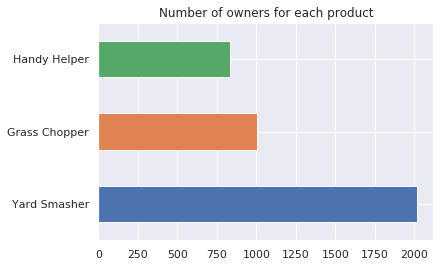

In [9]:
survey['prod'].value_counts().plot(kind='barh')
plt.title('Number of owners for each product')

2.What are the average ages of the owners of each product?

In [10]:
survey.groupby('prod')['age'].mean()

prod
Grass Chopper    50.057884
Handy Helper     67.414458
Yard Smasher     32.098068
Name: age, dtype: float64

Text(0.5,1,'Age distribution of owners by product')

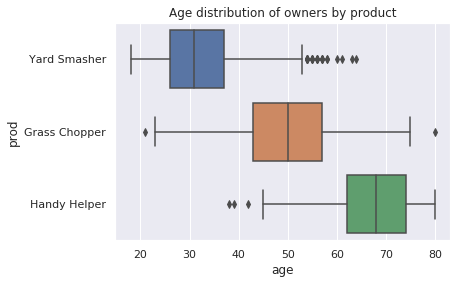

In [11]:
sns.boxplot(y='prod', x='age', data=survey)
plt.title('Age distribution of owners by product')

/home/douglas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


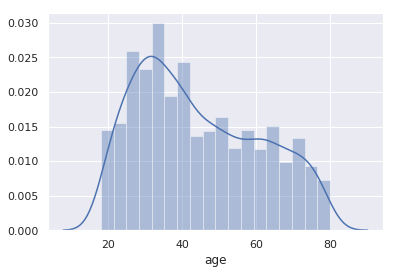

In [12]:
sns.distplot(survey['age'])

3.Which product is owned by the oldest people, on average?  
The Handy Helper. 

4.Which product is owned by the youngest people, on average?  
The Yard Smasher.

5.What perecentage of people are willing to receive an offer?

In [13]:
survey['receive.offer'].value_counts(normalize=True)

No     0.779538
Yes    0.220462
Name: receive.offer, dtype: float64

6.Which product has the highest percentage of owners willing to receive an offer?

In [14]:
survey.groupby('prod')['receive.offer'].value_counts(normalize=True)

prod           receive.offer
Grass Chopper  No               0.683633
               Yes              0.316367
Handy Helper   Yes              0.618072
               No               0.381928
Yard Smasher   No               0.990589
               Yes              0.009411
Name: receive.offer, dtype: float64

Text(0.5,1,'Customer willingness to receive offers by product ownership')

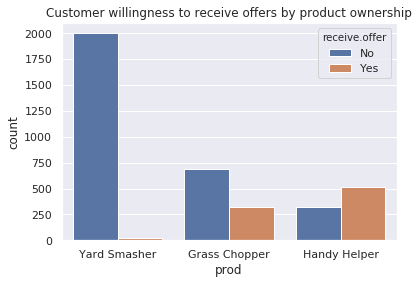

In [15]:
sns.countplot(x='prod', hue='receive.offer', data=survey)
plt.title('Customer willingness to receive offers by product ownership')

The Handy Helper has the highest percenage of owners willing to receive an offer. Correlate with older owners?

7.What percentage of people are repeat customers?

In [16]:
survey['repeat.customer'].value_counts(normalize=True)

No     0.51597
Yes    0.48403
Name: repeat.customer, dtype: float64

8.Which product has the highest percentage of repeat customers?

In [17]:
survey.groupby('prod')['repeat.customer'].value_counts(normalize=True)

prod           repeat.customer
Grass Chopper  Yes                0.581836
               No                 0.418164
Handy Helper   Yes                0.813253
               No                 0.186747
Yard Smasher   No                 0.699851
               Yes                0.300149
Name: repeat.customer, dtype: float64

Text(0.5,1,'Repeat customers by product ownership')

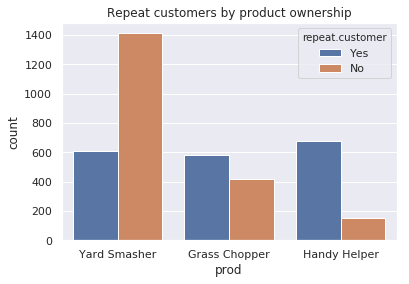

In [18]:
sns.countplot(x='prod', hue='repeat.customer', data=survey)
plt.title('Repeat customers by product ownership')

# Other 

Is there a significant difference between product owners on whether they are a repeat customer?  
H0: No difference between groups.  
H1: Difference between groups.

In [19]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [20]:
ct1 = survey[['prod', 'repeat.customer', 'id']].pivot_table(index='prod', columns='repeat.customer', aggfunc='count')
ct1

id     
repeat.customer    No  Yes
prod                      
Grass Chopper     419  583
Handy Helper      155  675
Yard Smasher     1413  606

In [21]:
ct2 = survey.groupby(['prod', 'repeat.customer']).size().unstack('prod')
ct2

prod,Grass Chopper,Handy Helper,Yard Smasher
repeat.customer,,,
No,419,155,1413
Yes,583,675,606


In [22]:
chi2_contingency(ct1)

(671.9425170487224,
 1.2289560298526353e-146,
 2,
 array([[ 517.00181771,  484.99818229],
        [ 428.2549987 ,  401.7450013 ],
        [1041.74318359,  977.25681641]]))

In [23]:
chi2_contingency(ct2)

(671.9425170487224,
 1.2289560298526353e-146,
 2,
 array([[ 517.00181771,  428.2549987 , 1041.74318359],
        [ 484.99818229,  401.7450013 ,  977.25681641]]))

In [24]:
stat, p , dof, expected = chi2_contingency(ct2)
print(f'dof={dof}')
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print(f'probability={prob:.3f}, critical={critical:.3f}, stat={stat:3f}')
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpet p-value
alpha = 1.0 - prob
print('significance={alpha:.3f}, p={p:.3f}')
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')    

dof=2
[[ 517.00181771  428.2549987  1041.74318359]
 [ 484.99818229  401.7450013   977.25681641]]
probability=0.950, critical=5.991, stat=671.942517
Dependent (reject H0)
significance={alpha:.3f}, p={p:.3f}
Dependent (reject H0)


Source for chi2 snippets: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/